In [1]:
import cv2

# Load the image
image = cv2.imread('/content/download.jpeg')


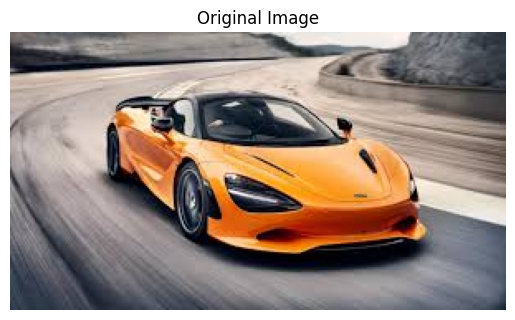

In [2]:
import matplotlib.pyplot as plt

# Display the image using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert to RGB for display
plt.title("Original Image")
plt.axis('off')
plt.show()


In [3]:
height, width, channels = image.shape
print(f"Height: {height}, Width: {width}, Channels: {channels}")


Height: 168, Width: 300, Channels: 3


In [4]:
total_pixels = height * width
print(f"Total Pixels: {total_pixels}")


Total Pixels: 50400


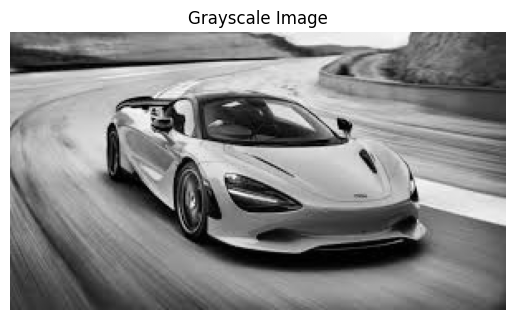

In [5]:
# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert RGB to Grayscale
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Display Grayscale Image
plt.imshow(image_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()


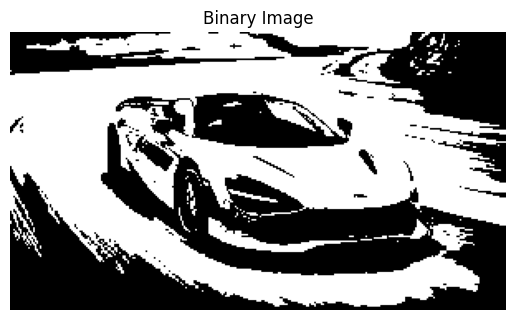

In [6]:
# Convert to Binary Image using Threshold
_, image_binary = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)

# Display the Binary Image
plt.imshow(image_binary, cmap='gray')
plt.title("Binary Image")
plt.axis('off')
plt.show()


In [9]:
# Correct calculation of black pixels
black_pixel_mask = (image_binary == 0).astype('uint8')  # Convert boolean array to uint8
black_pixels = cv2.countNonZero(black_pixel_mask)  # Count the non-zero (black) pixels

print(f"Number of black pixels: {black_pixels}")


Number of black pixels: 23360


task 2


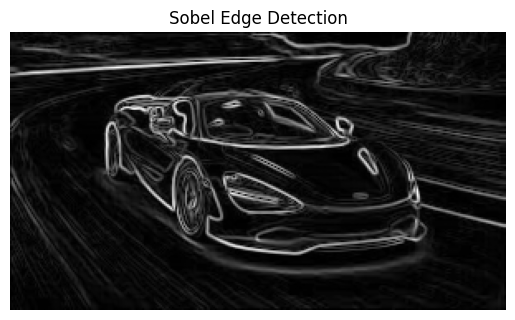

In [10]:
sobel_x = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')
plt.show()


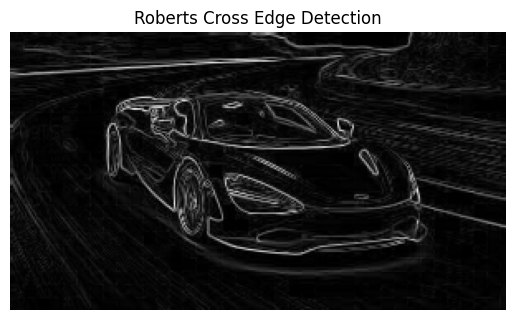

In [12]:
# Roberts Cross Edge Detection
roberts_kernel_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
roberts_kernel_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)

roberts_x = cv2.filter2D(image_gray, cv2.CV_32F, roberts_kernel_x)  # Convert to float32
roberts_y = cv2.filter2D(image_gray, cv2.CV_32F, roberts_kernel_y)  # Convert to float32
roberts_edges = cv2.magnitude(roberts_x, roberts_y)  # Compute magnitude

plt.imshow(roberts_edges, cmap='gray')
plt.title("Roberts Cross Edge Detection")
plt.axis('off')
plt.show()


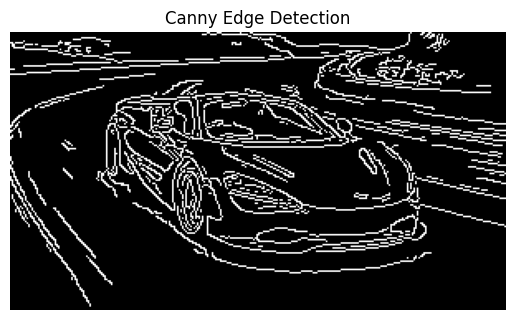

In [13]:
edges_canny = cv2.Canny(image_gray, threshold1=100, threshold2=200)

plt.imshow(edges_canny, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()


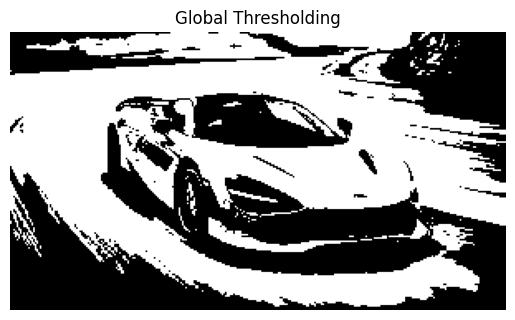

In [14]:
_, threshold_global = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(threshold_global, cmap='gray')
plt.title("Global Thresholding")
plt.axis('off')
plt.show()


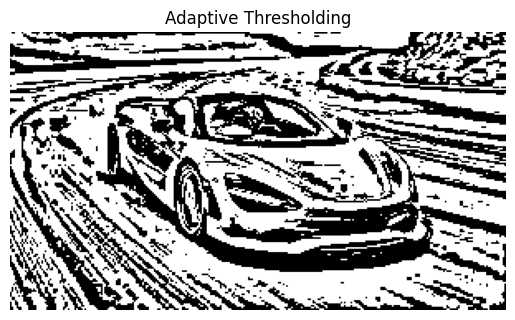

In [15]:
threshold_adaptive = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                           cv2.THRESH_BINARY, 11, 2)

plt.imshow(threshold_adaptive, cmap='gray')
plt.title("Adaptive Thresholding")
plt.axis('off')
plt.show()


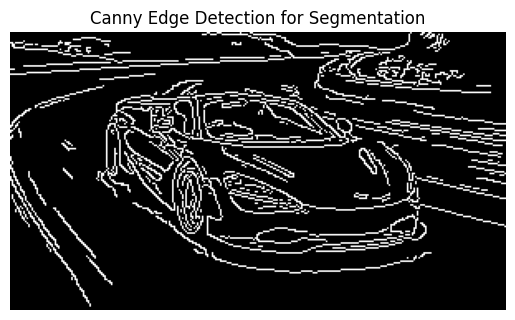

In [16]:
edges_canny = cv2.Canny(image_gray, 100, 200)
plt.imshow(edges_canny, cmap='gray')
plt.title("Canny Edge Detection for Segmentation")
plt.axis('off')
plt.show()


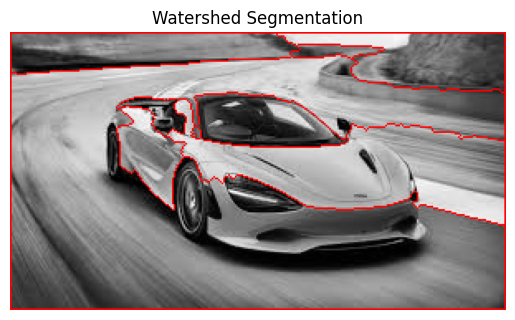

In [18]:
# Prepare the image for Watershed Algorithm
ret, thresh = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create markers with the correct data type (CV_32SC1)
markers = np.zeros_like(image_gray, dtype=np.int32)
for i in range(len(contours)):
    cv2.drawContours(markers, contours, i, (i + 1), -1)

# Mark the background
markers[thresh == 255] = 0

# Apply the Watershed algorithm
image_rgb = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2BGR)  # Ensure the input image is CV_8UC3
cv2.watershed(image_rgb, markers)

# Mark boundaries in red
image_rgb[markers == -1] = [0, 0, 255]

# Display the result
plt.imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.title("Watershed Segmentation")
plt.axis('off')
plt.show()
